# Versuch 223: Brown'sche Bewegung

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

## Importieren und graphische Darstellung der Messdaten

<Figure size 864x3240 with 0 Axes>

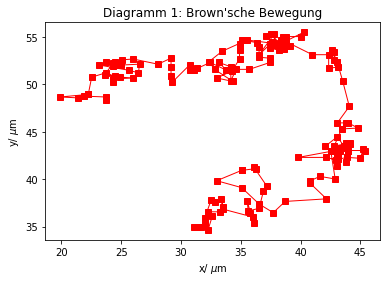

<Figure size 864x3240 with 0 Axes>

In [175]:
# Ersetzte Kommata durch Punkte
def comma_to_float(valstr):
    return float(valstr.decode("utf-8").replace(',', '.'))

# Importiere Daten
t, x, y, = np.loadtxt('Messung2.dat', skiprows = 1, usecols = (1, 2, 3), converters = {1:comma_to_float, 2:comma_to_float, 3:comma_to_float}, unpack = True)

# Plot
plt.plot(x, y, marker = 's', color = 'red', linewidth = 1)
plt.xlabel('x/ ' + '$\mu$' + 'm')
plt.ylabel('y/ ' + '$\mu$' + 'm')
plt.title("Diagramm 1: Brown'sche Bewegung")
plt.savefig('brown1.pdf', format = 'PDF')
plt.figure(figsize = (12,45))

## Berechnung des mttleren Verschiebungsquadrates und dessen Fehler

In [176]:
# Koordinatenänderungen
dt = np.array([])
dx = np.array([])
dy = np.array([])
i = 0
while i < len(t) - 1:
    dt = np.append(dt, t[i + 1] - t[i])
    dx = np.append(dx, x[i + 1] - x[i])
    dy = np.append(dy, y[i + 1] - y[i])
    i = i + 1

# Abstandsquadrat
r_squared = dx**2 + dy**2

# mittlere quadratische Abweichung
r_squared_mean = np.mean(r_squared)
r_squared_mean_std = np.std(r_squared) / np.sqrt(len(r_squared))
print('r_squared =', r_squared_mean, '+/-', r_squared_mean_std, '[10^(-12) m^2]')

dt_mean = np.mean(dt)
print('dt_mean =', dt_mean)

r_squared = 1.8159180812500004 +/- 0.15886493908432286 [10^(-12) m^2]
dt_mean = 1.0


In [179]:
# Berechnung der Boltzmann-Konstante
etha = 9.74 * 10**-4 #[Pa s]
delta_etha = 0.05 * 10**(-4) #[Pa s]
r = 377.5 * 10**(-9) #[m] umbenannt von a zu r, damit keine Verwechslung mit Steigung a
delta_r = 15 * 10**(-9) #[m]
T = 294.45 #[K]
delta_T = 0.1 #[K]
t = 1

k = 3 * np.pi * etha * r * r_squared_mean * 10**(-12) / (2 * T * t)
delta_k = k * np.sqrt((delta_etha / etha)**2 + (delta_r / r)**2 + (r_squared_mean_std / r_squared_mean)**2 + (delta_T / T)**2)
print('Boltzmann-Konstante: k =', k, '+/-', delta_k, '[J/K]')

Boltzmann-Konstante: k = 1.0685669530928658e-23 +/- 1.0282095353114797e-24 [J/K]


In [152]:
# Berechnung der Diffusionskonstante
D = r_squared_mean * 10**(-12) / (4 * t)
delta_D = r_squared_mean_std * 10**(-12) / (4 * t)
print('Diffusionskonstante: D =', D, '+/-', delta_D, '[m^2/s]')

Diffusionskonstante: D = 4.539795203125001e-13 +/- 3.9716234771080715e-14 [m^2/s]


## Kontrollverteilung

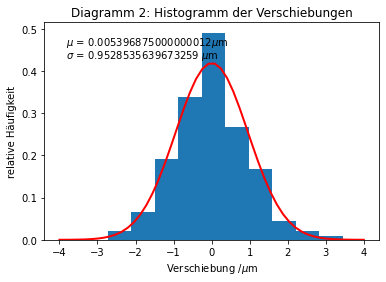

In [173]:
# Plot Histogramm
all_data = np.append(dx, dy)
plt.hist(all_data, density = True)
plt.xlabel('Verschiebung /' + '$\mu$' + 'm')
plt.ylabel('relative Häufigkeit')
plt.title('Diagramm 2: Histogramm der Verschiebungen')

# Gaussverteilung
mu1 = np.mean(all_data)
sigma1 = np.std(all_data)
def gaussian(x, mu, sigma):
    return 1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
gauss = gaussian(np.linspace(-4, 4), mu1, sigma1)

plt.text(-3.9, 0.46, ' $\mu$ = ' + str(mu) + '$\mu$m')
plt.text(-3.9, 0.43, ' $\sigma$ = ' + str(sigma) + ' $\mu$m')

plt.plot(np.linspace(-4, 4), gauss, 'r-', linewidth = 2)
plt.savefig('brown4.pdf', format = 'PDF')

## Kummulative Verteilung der Verschiebungsquadrate

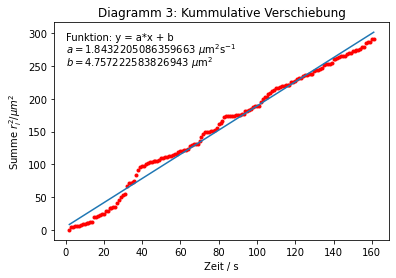

In [177]:
# Zusammenhang 
r_kumm = np.cumsum(r_squared)
plt.plot(t[:-1], r_kumm, marker = '.', color = 'red', linewidth = 0)
plt.xlabel('Zeit / s')
plt.ylabel('Summe $r_i^2 /\mu m^2$')
plt.title('Diagramm 3: Kummulative Verschiebung')

# Fit
def linear(x, a, b):
    return a * x + b
popt, pcov = curve_fit(linear, t[:-1], r_kumm)
plt.plot(t[:-1], linear(t[:-1], *popt))

a = popt[0]
delta_a = np.sqrt(pcov[0][0])
b = popt[1]
delta_b = np.sqrt(pcov[1][1])
plt.text(0, 290, 'Funktion: y = a*x + b')
plt.text(0, 270, '$a = $' + str(a) + ' $\mu$m$^2$s$^{-1}$')
plt.text(0, 250, '$b = $' + str(b) + ' $\mu$m$^2$')

plt.savefig('brown3.pdf', format = 'PDF')

In [181]:
# Berechnung D, k
D2 = a / 4 * 10**(-12)
delta_D2 = delta_a / 4 * 10**(-12)
print('Diffusionskonstante: D2 =', D2, '+/-', delta_D2, '[m^2/s]')

k2 = 6 * np.pi * etha * r * D2 / T
delta_k2 = k2 * np.sqrt((delta_T / T)**2 + (delta_etha / etha)**2 + (delta_r / r)**2 + (delta_D2 / D2)**2)
print('Boltzmann-Konstante: k2 = ', k2, '+/-', delta_k2, '[J/K]')

Diffusionskonstante: D2 = 4.608051271589915e-13 +/- 4.002680774373085e-15 [m^2/s]
Boltzmann-Konstante: k2 =  1.0846329155088455e-23 +/- 4.446726929526338e-25 [J/K]
